In [9]:
import pandas as pd
df = pd.read_csv("ce1dc0436aba5b7a5c9666f47fa5a380-5ce3854392b43ff97907112d344fc008229b0445/titanic.csv",sep=",")
df

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,Pears,Mrs. Thomas (Edith Wearne),female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,Meo,Mr. Alfonzo,male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,van Billiard,Mr. Austin Blyler,male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,Olsen,Mr. Ole Martin,male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [10]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 ])

In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [12]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2'], dtype=object)

In [13]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

In [14]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [16]:
def preprocess_data(new_data):
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data["Age"] = new_data["Age"].astype(int)
    return new_data
data=preprocess_data(df)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.metrics import accuracy_score

In [19]:
x=data[["Sex", "Age",'SibSp']]
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree1 = tree.DecisionTreeClassifier()  

tree1.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.71875


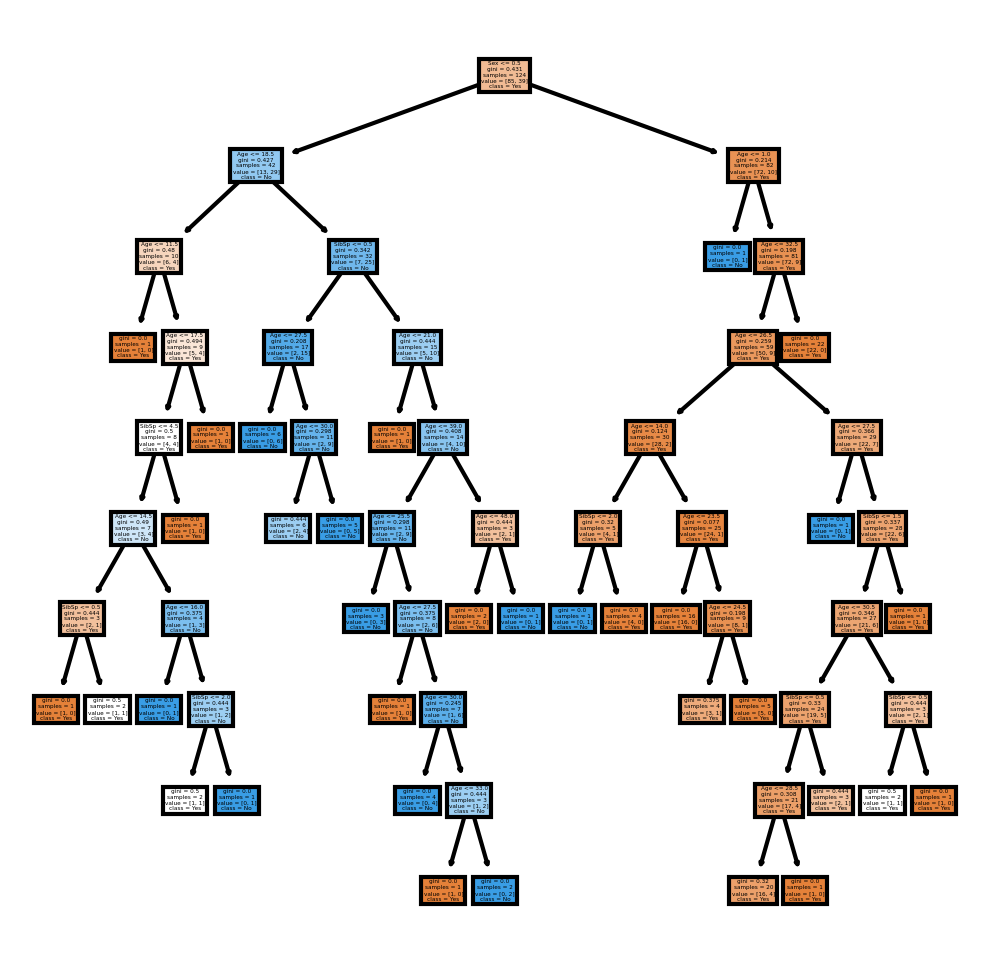

In [20]:
import matplotlib.pyplot as plt

fn=['Sex','Age','SibSp']
cn=['Survived']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(tree1,
               feature_names = fn,
               class_names=["Yes","No"],
               filled = True);
fig.savefig('imagename.png')

In [24]:
!pip install pydotplus

import pydotplus
dot_data = tree.export_graphviz(tree1, out_file=None,
            feature_names=["Age","Sex",'SibSp'],
            filled=True, rounded=True,
            special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("titanicDecisionTree2.pdf")

Processing c:\users\fujitsu\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36\pydotplus-2.0.2-py3-none-any.whl


True

In [22]:
x=data[["Sex", "Age",'SibSp']]
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree1 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)  
tree1.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.75


this score is higher than the previous one

In [5]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 

iris = datasets.load_iris()

data=pd.DataFrame({
'Sex': iris.data[:,0],
'Age': iris.data[:,1],
'SibSp': iris.data[:,2],
'Survived': iris.target})

X=data[['Sex', 'Age', 'SibSp']] #features
y=data['Survived']  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

In [6]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  

Accuracy: 0.9111111111111111


the accuracy is the highest one